### 막대 그래프 

- 데이터 값의 크기에 비례하여 높이를 가짐 
- 세로형과 가로형 막대 그래프가 있음
- 세로형 막대 그래프는 시간적 차이가 나는 두 점에서 데이터 값 차이를 설명하기 쉬움 
- 즉, 시계열 데이터를 표현하는데 적합 
- plot() 메소드의 kind = 'bar' 옵션을 설정

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
font_path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\시도별 전출입 인구수.xlsx'
df = pd.read_excel(path, header =0, engine='openpyxl')

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace =True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot')

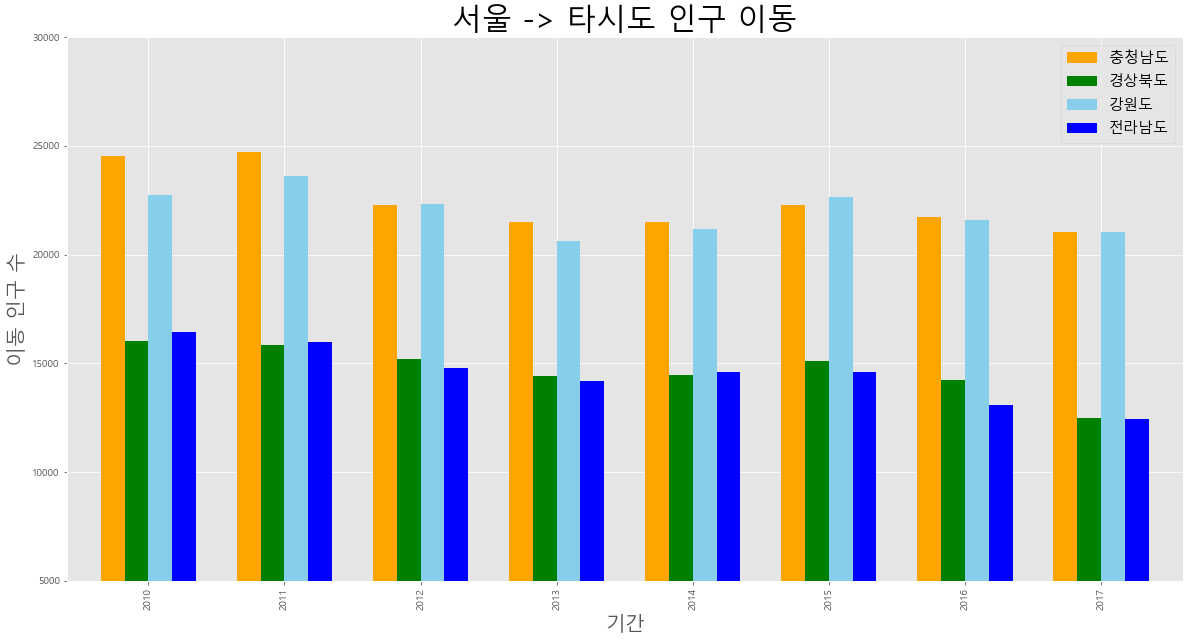

In [4]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

df_4.index = df_4.index.map(int)

df_4.plot(kind = 'bar', figsize = (20, 10), width = 0.7,
        color = ['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size =30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.ylim(5000, 30000)
plt.legend(loc = 'best', fontsize = 15)

plt.show()